UE: PHY_4268_Evaluation_Sommative

Noms et prenoms:NIMPAH MITTERAND

Matricule:13K2208

Email:mitterand.nimpah@facsciences_uy1.com

Department of Physics - Faculty of Science - University of Yaoundé I

Nom du Laboratoire: PHYSIQUE ATOMIQUE ET BIOPHYSIQUE

Date:19 Juin 2023


In [2]:
import qiskit.tools.jupyter

%qiskit_version_table

### # VQE avec un Hardware Efficient Ansatz (HEA)

 ###  1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

In [3]:
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram, visualize_transition 
from math import pi
import numpy as np
from qiskit.circuit import ParameterVector
from qiskit.circuit import Parameter
theta= Parameter('θ')


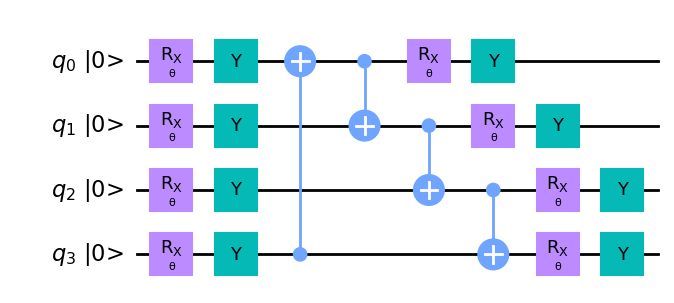

In [4]:
qb1 = QuantumCircuit(4)
qb1.rx(theta,0)
qb1.y(0)
qb1.rx(theta,1)
qb1.y(1)
qb1.rx(theta,2)
qb1.y(2)
qb1.rx(theta,3)
qb1.y(3)
qb1.cx(3,0)
qb1.cx(0,1)
qb1.cx(1,2)
qb1.cx(2,3)
qb1.rx(theta,0)
qb1.y(0)
qb1.rx(theta,1)
qb1.y(1)
qb1.rx(theta,2)
qb1.y(2)
qb1.rx(theta,3)
qb1.y(3)

qb1.draw('mpl',initial_state=True)

### 2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [5]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [6]:
rom qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

SyntaxError: invalid syntax (1240299955.py, line 1)

In [7]:
from pyscf import gto, scf, mcscf
from pyscf.mcscf import avas #AVAS method to construct mcscf active space

from qiskit_nature_pyscf import QiskitSolver

In [2]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP


In [9]:
#  Initialisation de la structure moléculaire
H2_mol = gto.M(atom="H 0 0 0; H 0 0 .735", basis="sto-3g")

In [ ]:
# Calculs HF 
H2_h_f = scf.RHF(H2_mol).run()

# Calculs post-HF
norb, nelec, mo =avas.avas(H2_h_f,['H 1s','H 1s'])

H2_cas = mcscf.CASCI(H2_h_f, norb, nelec)

# Intégration de l'algorithme quantique
mapper = ParityMapper()
optimizer = SLSQP()
H2_cas.fcisolver = QiskitSolver(algorithm(mapper, optimizer))

H2_cas.run()

In [11]:
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

def ansatz(converter):
    """Ansatz function

    Args:
        converter : the output of the function qubit_converter(mapper)

    Returns: The anstatz
    """    
    
    ansatz = UCCSD(
        H2_problem.num_spatial_orbitals,
        H2_problem.num_particles,
        converter,
        initial_state=HartreeFock(
            H2_problem.num_spatial_orbitals,
            H2_problem.num_particles,
            converter,
        ),
    )
    return ansatz

In [12]:
hamiltonian = problem.hamiltonian

coefficients = hamiltonian.electronic_integrals
print(coefficients.alpha)


NameError: name 'problem' is not defined

### support Vector REgression to predict polarity of molecules

Write a python script that use a support vector regression (SVR) model to predict TPSA (Topological polar surface area, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file '.Zn10.txt'. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the molecular fingerprint represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called Quantitative Structure-Activity Relationships (QSAR).

The workflow is

    Get molecular fingerprints of each molecule
    Split the dataset to training set and test set
    Train a SVR model
    Check the accuracy of prediction with 𝑅²

    and mean-square error
    Visualize the results from the model.

The various necessaries libraries and modules will be import only where they are needed.


In [13]:
# Import libraries 
import numpy as np
#Permet de tracer
import matplotlib.pyplot as plt
#bibliotheque
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [14]:
pip install 'rdkit'

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#permet de ressortir la molecule
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [ ]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))

In [ ]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/smilesZn100.txt')

In [ ]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile

In [ ]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
#ici on sectionne notre base de donnee via df1
df1 = df.iloc[:1000,:]#.values nous donne les valeurs
df1
#si on me demande de travailler avec les 1000 premiers valeurs j aurais par exemple df1 = df.iloc[:1000,:]

In [ ]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [ ]:
data.isnull().sum()

In [ ]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)
#

In [ ]:
fps = np.asarray(fps)
fps
#

In [ ]:
fps.shape
#taille de nos fingerprints

2. Split the dataset to training set and test set

In [ ]:
logp = data.iloc[:,3].values

In [ ]:
logp.shape[0] == fps.shape[0]

In [ ]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

In [ ]:
3. Train a SVR model

In [ ]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print('The r2_score is {} '.format(r2),'and the mean square error is {}'.format(mse))
#pour afficher les scores

5. Validate the trained model using test-set
si r2 est superieur ou egale a 0.9 le modele est performant dans le cas contraire le moedele nest pas performa

In [ ]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()
# pour visualiser

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$


où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utilisons `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.